In [1]:
import pandas as pd
import talib
import yfinance as yf





In [2]:
# Load stock price data
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\TSLA_historical_data.csv') 
# Convert 'Date' to datetime format and set it as the index
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Convert relevant columns to numeric and fill null values
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Count null values
null_counts = df.isnull().sum()
print("Null values in each column:")
print(null_counts)

# Remove rows with any null values
df_cleaned = df.dropna()

# Display shape before and after cleaning
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_cleaned.shape}")

# If you need to continue with calculations
df_cleaned['SMA'] = talib.SMA(df_cleaned['Close'], timeperiod=14)
df_cleaned['RSI'] = talib.RSI(df_cleaned['Close'], timeperiod=14)
df_cleaned['MACD'], df_cleaned['MACD_Signal'], df_cleaned['MACD_Hist'] = talib.MACD(df_cleaned['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Final DataFrame structure
print("Final cleaned DataFrame structure:")
print(df_cleaned.info())
print(df.dtypes)

Null values in each column:
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Original DataFrame shape: (3545, 8)
Cleaned DataFrame shape: (3545, 8)
Final cleaned DataFrame structure:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3545 entries, 2010-06-29 to 2024-07-30
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3545 non-null   float64
 1   High          3545 non-null   float64
 2   Low           3545 non-null   float64
 3   Close         3545 non-null   float64
 4   Adj Close     3545 non-null   float64
 5   Volume        3545 non-null   int64  
 6   Dividends     3545 non-null   float64
 7   Stock Splits  3545 non-null   float64
 8   SMA           3532 non-null   float64
 9   RSI           3531 non-null   float64
 10  MACD          3512 non-null   float64
 11  MACD_Signal   3512 n

In [3]:
null_counts = df.isnull().sum()

In [4]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [5]:
# If 'Date' is found, convert it to datetime and set as index
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\TSLA_historical_data.csv') 
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    print("Date column converted and set as index.")
    df=[print(df.head)]
   
else:
    print("No 'Date' column found. Please check the CSV structure.")
    


Date column converted and set as index.
<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-29    1.266667    1.666667    1.169333    1.592667    1.592667   
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
...                ...         ...         ...         ...         ...   
2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
2024-07-30  232.250000  232.410004  220.00

In [4]:
import talib
import pandas as pd
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\TSLA_historical_data.csv') 
# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days
# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12,slowperiod=26,signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()
# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])                           

           Close         SMA        RSI       MACD  MACD_Signal  MACD_Hist
200     1.662000    1.582103  50.375558   0.035204     0.035181   0.000023
201     1.676000    1.582540  50.451086   0.031508     0.034447  -0.002939
202     1.705333    1.583747  50.609378   0.030594     0.033676  -0.003083
203     1.668667    1.585690  50.407075   0.026603     0.032261  -0.005658
204     1.677333    1.588707  50.454120   0.023865     0.030582  -0.006717
...          ...         ...        ...        ...          ...        ...
3540  215.990005  205.241000  50.201595  11.789291    15.873789  -4.084498
3541  220.250000  205.039600  50.394554   9.353206    14.569672  -5.216466
3542  219.800003  204.840250  50.373832   7.302106    13.116159  -5.814053
3543  232.100006  204.682650  50.928144   6.593101    11.811547  -5.218447
3544  222.619995  204.480800  50.491286   5.206237    10.490485  -5.284248

[3345 rows x 6 columns]


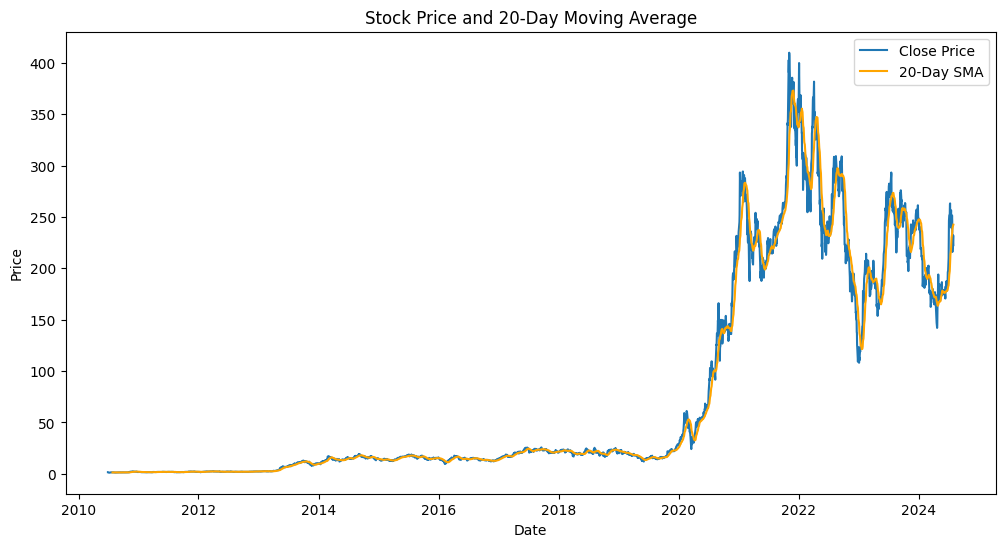

In [5]:
import matplotlib.pyplot as plt
# Load the data into a DataFrame
df = pd.read_csv(r'C:\Users\Admin.DESKTOP-M4R2VLU\Documents\week0ne\data\TSLA_historical_data.csv', parse_dates=['Date'], index_col='Date')

# Ensure the 'Close' column is  correct data type
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Calculate a 20-day moving average
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
# Plot the closing prices and the moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['SMA_20'], label='20-Day SMA', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price and 20-Day Moving Average')
plt.legend()
plt.show()